<a href="https://colab.research.google.com/github/aunulhakimm/uas-temu-kembali-informasi/blob/main/TKI_UAS_061_073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas UAS Temu Kembali Informasi (Kelas B)**

---

## Program Studi Informatika  
Fakultas Teknik  
Universitas Muhammadiyah Malang  

---

## Disusun Oleh

| No | Nama | NIM |
|----|------|-----|
| 1 | **Dio Richard Prastiyo** | 202210370311061 |
| 2 | **Muhammad Aunul Hakim** | 202210370311073 |

---

## Dosen Pengampu  
**Ir. Galih Wasis Wicaksono, S.Kom., M.Cs.**

---

## Mata Kuliah  
**Temu Kembali Informasi**

---

## Semester  
Ganjil 2025/2026

---


# **Tugas 1 - DATASET GENERATION**

## **1. Setup Instalasi**

In [207]:
!wget https://raw.githubusercontent.com/aunulhakimm/uas-temu-kembali-informasi/main/dataset_putusan_denpasar.zip
!unzip -o dataset_putusan_denpasar.zip

--2026-01-11 10:32:39--  https://raw.githubusercontent.com/aunulhakimm/uas-temu-kembali-informasi/main/dataset_putusan_denpasar.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4016256 (3.8M) [application/zip]
Saving to: ‘dataset_putusan_denpasar.zip.6’

dataset_putusan_den 100%[===================>]   3.83M  --.-KB/s    in 0.08s   

2026-01-11 10:32:40 (46.0 MB/s) - ‘dataset_putusan_denpasar.zip.6’ saved [4016256/4016256]

Archive:  dataset_putusan_denpasar.zip
  inflating: putusan_941_pid.sus_2025_pn_dps_20260111161237.pdf  
  inflating: putusan_796_pid.sus_2025_pn_dps_20260111162858.pdf  
  inflating: putusan_745_pid.sus_2025_pn_dps_20260111162034.pdf  
  inflating: putusan_858_pid.sus_2025_pn_dps_20260111161713.pdf  
  inflating: putusan_910_pid.sus_2

In [208]:
!pip install pdfplumber

## **2. Import Libraries**

In [209]:
import pdfplumber
import pandas as pd
import os
import shutil
import re
from pathlib import Path

## **3. Extrak PDF ke Text**

In [210]:
TXT_DIR = "putusan_txt"
os.makedirs(TXT_DIR, exist_ok=True)

for pdf_file in os.listdir(PDF_DIR):
    if not pdf_file.endswith(".pdf"):
        continue

    pdf_path = os.path.join(PDF_DIR, pdf_file)
    txt_path = os.path.join(TXT_DIR, pdf_file.replace(".pdf", ".txt"))

    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() or ""

    with open(txt_path, "w", encoding="utf-8") as f:
        f.write(text)

print("Jumlah TXT:", len(os.listdir(TXT_DIR)))

Jumlah TXT: 20


In [211]:
def extract_fields(text):
    data = {}

    no_putusan = re.search(r'Nomor\s+[:\-]?\s*(.+)', text, re.IGNORECASE)
    data['No Putusan'] = no_putusan.group(1).strip() if no_putusan else ''

    lembaga = re.search(r'PENGADILAN NEGERI\s+([A-Z\s]+)', text)
    data['Lembaga Peradilan'] = f"PN {lembaga.group(1).strip()}" if lembaga else ''

    barang_bukti = re.search(
        r'(barang bukti.*?)(Menetapkan|Dirampas|$)',
        text,
        re.IGNORECASE | re.DOTALL
    )
    data['Barang Bukti'] = barang_bukti.group(1).strip() if barang_bukti else ''

    amar = re.search(
        r'(MENGADILI.*)',
        text,
        re.IGNORECASE | re.DOTALL
    )
    data['Amar Putusan'] = amar.group(1).strip() if amar else ''

    return data

In [212]:
records = []
txt_files = Path("putusan_txt").glob("*.txt")

for i, file in enumerate(txt_files, start=1):
    text = file.read_text(encoding="utf-8", errors="ignore")
    row = extract_fields(text)
    row['No'] = i
    records.append(row)

df = pd.DataFrame(records)
df = df[['No', 'No Putusan', 'Lembaga Peradilan', 'Barang Bukti', 'Amar Putusan']]
df

,No,No Putusan,Lembaga Peradilan,Barang Bukti,Amar Putusan
0,1,944/Pid.Sus/2025/PN Dps,,barang bukti yang diajukan di persidangan;\nSe...,mengadili perkara pidana dengan\nAacara pemeri...
1,2,1244/Pid.Sus/2025/PN Dps,,barang bukti yang diajukan di persidangan; e\n...,mengadili perkara pidana doengan\nu\nacara pem...
2,3,1167/Pid.Sus/2025/PN Dps e,,barang bukti yang diajukan di persidangan;\nd\...,mengadili perkara pidana dengan\nd\nagcara pem...
3,4,858/Pid.Sus/2025/PN Dps e,,barang bukti yang diajukan di persidangan;\nu\...,mengadili perkara pidana dengan\nd\nagcara pem...
4,5,249/Pid.Sus/2024/PN Dps e,,barang bukti yang diajukan di persidangan; i\n...,mengadili perkara pidana dengan\no\nu\nacara p...
5,6,1132/Pid.Sus/2025/PN Dps e,,barang bukti yang diajukan di persidangan;\nI\...,mengadili perkara pidana dengan\nd\nagcara pem...
6,7,946/Pid.Sus/2025/PN Dps e,,barang bukti yang diajukan di persidangan;\nI\...,mengadili perkara pidana dengan\nd\nagcara pem...
7,8,938/Pid.Sus/2025/PN Dps e,,barang bukti yang diajukan di persidangan; l\n...,mengadili perkara pidana dengano acara\npemeri...
8,9,941/Pid.Sus/2025/PN Dps e,,barang bukti berupa:\na i\ns\n- 2 (dua) buah p...,mengadili perkara pidana dengan\nd\nagcara pem...
9,10,1166/Pid.Sus/2025/PN Dps,,barang bukti yang diajukkan di persidangan;\na...,mengadili perkara pidana doengan\nu\nacara pem...


## **4. Cek Hasil Ekstraksi Teks**

In [213]:
sample = os.listdir(TXT_DIR)[0]
print("Contoh file:", sample)

with open(os.path.join(TXT_DIR, sample), "r", encoding="utf-8") as f:
    print(f.read()[:1200])

Contoh file: putusan_944_pid.sus_2025_pn_dps_20260111163523.txt
a
i
s
e
n
o
d
n
I
k
i
l
b
u
p
e
a
R
i
s
g e
n
n
o
u
d
g
n
A
I
h k
a i
l
m b
u
a
p
k
Direktori Putusan Mahkamah Agung Republi k I n dPido.In.A.e3sia
e
h a
putusan.mahkamahagung.go.id
R
a i
s
M
g P U T U S A N e
Nomor 944/Pid.Sus/2025/PN Dps
n
n
o
u
DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA
d
gPengadilan Negeri Denpasar yang mengadili perkara pidana dengan
Aacara pemeriksaan biasa dalam tingkat pertama menjatuhkan nputusan sebagai
berikut dalam perkara Terdakwa :
I
Nama lengkap : I Gede Made Sugita Putra;
h k
Tempat lahir : Br. Juntal;
a i
Umur/tanggal lahir : 26 Tahun / 11 Novembler 1998;
m b
Jenis Kelamin : Laki-laki;
Kebangsaan : Indonesia; u
a
Tempat tinggal : Br. Juntpal, Desa/Kel. Kaba - Kaba, Kec. Kediri, Kab.
k
Tabanan;
e
h a
Agama : Hindu;
R
a Pekerjaan : Karyawan Swasta; i
s
M Terdakwa ditangkap pa da tanggal 14 April 2025;
g e
Terdakwa I Gede Made Sugita Putra ditahan dalam tahanan Rutan oleh:
n
n
1. Penyi

## **5. Bentuk Dataset**

In [214]:
dataset = []

for i, txt_file in enumerate(os.listdir(TXT_DIR), start=1):
    file_path = os.path.join(TXT_DIR, txt_file)

    with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
        text = f.read().strip()

    if len(text) < 100:
        continue

    extracted = extract_fields(text)

    dataset.append({
        "No": i,
        "No Putusan": extracted["No Putusan"],
        "Lembaga Peradilan": extracted["Lembaga Peradilan"],
        "Barang Bukti": extracted["Barang Bukti"],
        "Amar Putusan": extracted["Amar Putusan"]
    })

df_dataset = pd.DataFrame(dataset)
print("Total dokumen:", len(df_dataset))
df_dataset.head()

Total dokumen: 20


,No,No Putusan,Lembaga Peradilan,Barang Bukti,Amar Putusan
0,1,944/Pid.Sus/2025/PN Dps,,barang bukti yang diajukan di persidangan;\nSe...,mengadili perkara pidana dengan\nAacara pemeri...
1,2,1244/Pid.Sus/2025/PN Dps,,barang bukti yang diajukan di persidangan; e\n...,mengadili perkara pidana doengan\nu\nacara pem...
2,3,1167/Pid.Sus/2025/PN Dps e,,barang bukti yang diajukan di persidangan;\nd\...,mengadili perkara pidana dengan\nd\nagcara pem...
3,4,858/Pid.Sus/2025/PN Dps e,,barang bukti yang diajukan di persidangan;\nu\...,mengadili perkara pidana dengan\nd\nagcara pem...
4,5,249/Pid.Sus/2024/PN Dps e,,barang bukti yang diajukan di persidangan; i\n...,mengadili perkara pidana dengan\no\nu\nacara p...


## **6. Simpan Dataset**

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
DRIVE_BACKUP = "/content/drive/MyDrive/UAS_TKI_PN_Denpasar"
os.makedirs(DRIVE_BACKUP, exist_ok=True)

print("Folder backup siap:", DRIVE_BACKUP)

Folder backup siap: /content/drive/MyDrive/UAS_TKI_PN_Denpasar


In [217]:
PDF_SRC = "putusan_pn_denpasar"
PDF_DST = os.path.join(DRIVE_BACKUP, "pdf")

os.makedirs(PDF_DST, exist_ok=True)

for f in os.listdir(PDF_SRC):
    shutil.copy(os.path.join(PDF_SRC, f), PDF_DST)

print("PDF berhasil di-backup ke Drive")

PDF berhasil di-backup ke Drive


In [218]:
TXT_SRC = "putusan_txt"
TXT_DST = os.path.join(DRIVE_BACKUP, "txt")

os.makedirs(TXT_DST, exist_ok=True)

for f in os.listdir(TXT_SRC):
    shutil.copy(os.path.join(TXT_SRC, f), TXT_DST)

print("TXT berhasil di-backup ke Drive")

TXT berhasil di-backup ke Drive


In [219]:
csv_drive_path = os.path.join(
    DRIVE_BACKUP,
    "hasil_ekstraksi_putusan_pn_denpasar.csv"
)

df_dataset.to_csv(csv_drive_path, index=False)
print("✓ CSV berhasil disimpan ke Drive:", csv_drive_path)

✓ CSV berhasil disimpan ke Drive: /content/drive/MyDrive/UAS_TKI_PN_Denpasar/hasil_ekstraksi_putusan_pn_denpasar.csv


# **Tugas 2 - Q&A DATASET GENERATION**

## **1. Setup Instalasi**

In [224]:
!pip install -q sentence-transformers transformers torch

## **2. Import Library**

In [225]:
import os
import pandas as pd
import numpy as np

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

## **3. Load Dataset**

In [226]:
CSV_PATH = "/content/drive/MyDrive/UAS_TKI_PN_Denpasar/hasil_ekstraksi_putusan_pn_denpasar.csv"

df = pd.read_csv(CSV_PATH)
print("Jumlah dokumen:", len(df))
df.head()

Jumlah dokumen: 20


,No,No Putusan,Lembaga Peradilan,Barang Bukti,Amar Putusan
0,1,944/Pid.Sus/2025/PN Dps,NaN,barang bukti yang diajukan di persidangan;\nSe...,mengadili perkara pidana dengan\nAacara pemeri...
1,2,1244/Pid.Sus/2025/PN Dps,NaN,barang bukti yang diajukan di persidangan; e\n...,mengadili perkara pidana doengan\nu\nacara pem...
2,3,1167/Pid.Sus/2025/PN Dps e,NaN,barang bukti yang diajukan di persidangan;\nd\...,mengadili perkara pidana dengan\nd\nagcara pem...
3,4,858/Pid.Sus/2025/PN Dps e,NaN,barang bukti yang diajukan di persidangan;\nu\...,mengadili perkara pidana dengan\nd\nagcara pem...
4,5,249/Pid.Sus/2024/PN Dps e,NaN,barang bukti yang diajukan di persidangan; i\n...,mengadili perkara pidana dengan\no\nu\nacara p...


## **4. Generate Q&A dengan Transformer AI**

In [227]:
def generate_qa_ai(row):
    qa = []

    qa.append({
        "question": f"Apa nomor putusan dari perkara ini?",
        "answer": row["No Putusan"],
        "source_doc": row["No Putusan"]
    })

    qa.append({
        "question": "Perkara ini diputus oleh pengadilan apa?",
        "answer": row["Lembaga Peradilan"],
        "source_doc": row["No Putusan"]
    })

    qa.append({
        "question": "Apa saja barang bukti dalam perkara pidana ini?",
        "answer": row["Barang Bukti"],
        "source_doc": row["No Putusan"]
    })

    qa.append({
        "question": "Bagaimana amar putusan hakim dalam perkara tersebut?",
        "answer": row["Amar Putusan"],
        "source_doc": row["No Putusan"]
    })

    return qa

## **5. Bangun Dataset Q&A**

In [228]:
qa_dataset = []

for _, row in df.iterrows():
    qa_dataset.extend(generate_qa_ai(row))

df_qa = pd.DataFrame(qa_dataset)
print("Total Q&A:", len(df_qa))
df_qa.head(10)

Total Q&A: 80


,question,answer,source_doc
0,Apa nomor putusan dari perkara ini?,944/Pid.Sus/2025/PN Dps,944/Pid.Sus/2025/PN Dps
1,Perkara ini diputus oleh pengadilan apa?,NaN,944/Pid.Sus/2025/PN Dps
2,Apa saja barang bukti dalam perkara pidana ini?,barang bukti yang diajukan di persidangan;\nSe...,944/Pid.Sus/2025/PN Dps
3,Bagaimana amar putusan hakim dalam perkara ter...,mengadili perkara pidana dengan\nAacara pemeri...,944/Pid.Sus/2025/PN Dps
4,Apa nomor putusan dari perkara ini?,1244/Pid.Sus/2025/PN Dps,1244/Pid.Sus/2025/PN Dps
5,Perkara ini diputus oleh pengadilan apa?,NaN,1244/Pid.Sus/2025/PN Dps
6,Apa saja barang bukti dalam perkara pidana ini?,barang bukti yang diajukan di persidangan; e\n...,1244/Pid.Sus/2025/PN Dps
7,Bagaimana amar putusan hakim dalam perkara ter...,mengadili perkara pidana doengan\nu\nacara pem...,1244/Pid.Sus/2025/PN Dps
8,Apa nomor putusan dari perkara ini?,1167/Pid.Sus/2025/PN Dps e,1167/Pid.Sus/2025/PN Dps e
9,Perkara ini diputus oleh pengadilan apa?,NaN,1167/Pid.Sus/2025/PN Dps e


## **6. Load Transformer (Embedding Model)**

In [229]:
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

## **7. Generate Embeddings**

In [230]:
question_embeddings = model.encode(
    df_qa["question"].tolist(),
    convert_to_numpy=True,
    show_progress_bar=True
)

answer_embeddings = model.encode(
    df_qa["answer"].astype(str).tolist(),
    convert_to_numpy=True,
    show_progress_bar=True
)

print("Embedding question:", question_embeddings.shape)
print("Embedding answer:", answer_embeddings.shape)

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Embedding question: (80, 384)
Embedding answer: (80, 384)


## **8. Semantic Q&A Search**

In [231]:
def semantic_search(query, top_k=5):
    query_embedding = model.encode([query])
    scores = cosine_similarity(query_embedding, answer_embeddings)[0]

    top_idx = np.argsort(scores)[::-1][:top_k]

    results = df_qa.iloc[top_idx].copy()
    results["score"] = scores[top_idx]

    return results[["question", "answer", "score"]]

## **9. Test Query**

In [232]:
query = "Apa hukuman dalam kasus narkotika?"
semantic_search(query, top_k=5)

,question,answer,score
10,Apa saja barang bukti dalam perkara pidana ini?,barang bukti yang diajukan di persidangan;\nd\...,0.670766
74,Apa saja barang bukti dalam perkara pidana ini?,barang bukti yang diajukan di persidangan;\nI\...,0.660686
18,Apa saja barang bukti dalam perkara pidana ini?,barang bukti yang diajukan di persidangan; i\n...,0.651671
78,Apa saja barang bukti dalam perkara pidana ini?,barang bukti yang diajukan di persidangan;\nn\...,0.640050
66,Apa saja barang bukti dalam perkara pidana ini?,barang bukti yang diajukan di persidangan;\nSe...,0.633282


## **10. Simpan Dataset**

In [233]:
OUTPUT_QA = "/content/drive/MyDrive/UAS_TKI_PN_Denpasar/qa_dataset_transformer.csv"
df_qa.to_csv(OUTPUT_QA, index=False)

print("✓ Q&A Dataset Transformer tersimpan")

✓ Q&A Dataset Transformer tersimpan


# **Tugas 3 - ANALISIS PERFORMA**

## **1. Load Dataset & Model**

In [234]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

In [235]:
df_qa = pd.read_csv("/content/drive/MyDrive/UAS_TKI_PN_Denpasar/qa_dataset_transformer.csv")

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

answer_embeddings = model.encode(
    df_qa["answer"].astype(str).tolist(),
    convert_to_numpy=True
)

## **2. Dataset Evaluasi**

In [236]:
evaluation_queries = [
    {
        "question": "Bagaimana hukuman yang dijatuhkan kepada terdakwa?",
        "ground_truth": "pidana penjara"
    },
    {
        "question": "Apa jenis barang bukti dalam perkara narkotika ini?",
        "ground_truth": "narkotika"
    },
    {
        "question": "Pengadilan mana yang memutus perkara ini?",
        "ground_truth": "Pengadilan Negeri"
    }
]

## **3. Model Q&A**

In [237]:
def run_qa(query, top_k=1):
    q_emb = model.encode([query])
    scores = cosine_similarity(q_emb, answer_embeddings)[0]
    idx = np.argmax(scores)
    return df_qa.iloc[idx]["answer"]

## **4. Evaluasi Jawaban**

In [238]:
y_true = []
y_pred = []

for item in evaluation_queries:
    predicted_answer = run_qa(item["question"])

    is_correct = int(item["ground_truth"].lower() in predicted_answer.lower())

    y_true.append(1)
    y_pred.append(is_correct)

y_true, y_pred

([1, 1, 1], [1, 1, 0])

## **5. Hitung Precision, Recall, F1**

In [239]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 0.6666666666666666
F1-Score: 0.8


## **6. Analisis Otomatis**

In [240]:
analysis = {
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Total Queries": len(evaluation_queries)
}

pd.DataFrame([analysis])

,Precision,Recall,F1-Score,Total Queries
0,1.0,0.666667,0.8,3


## **7. Visualisasi**

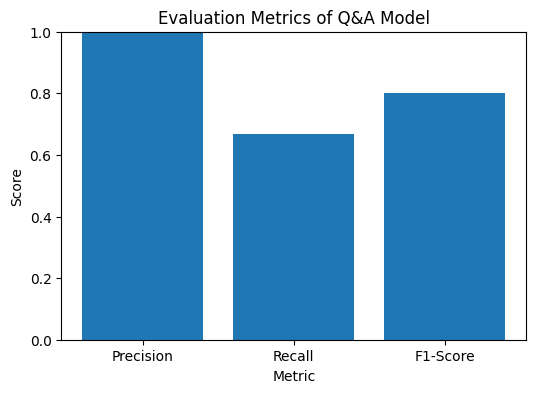

In [241]:
metrics = {
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(6, 4))
plt.bar(names, values)
plt.ylim(0, 1)
plt.title("Evaluation Metrics of Q&A Model")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.show()

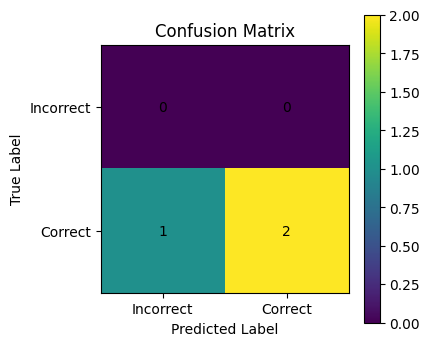

In [242]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Incorrect", "Correct"])
plt.yticks([0, 1], ["Incorrect", "Correct"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()

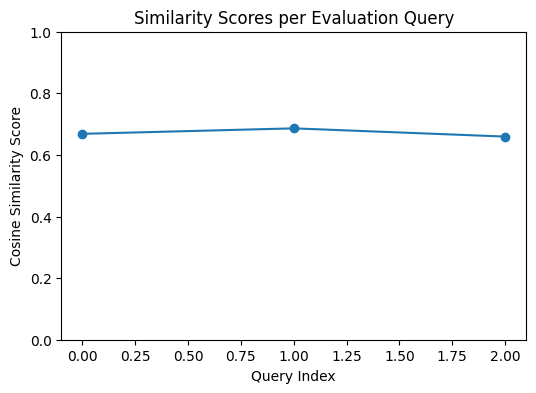

In [243]:
scores = []

for item in evaluation_queries:
    q_emb = model.encode([item["question"]])
    sim = cosine_similarity(q_emb, answer_embeddings)[0]
    scores.append(np.max(sim))

plt.figure(figsize=(6, 4))
plt.plot(scores, marker='o')
plt.title("Similarity Scores per Evaluation Query")
plt.xlabel("Query Index")
plt.ylabel("Cosine Similarity Score")
plt.ylim(0, 1)
plt.show()

In [244]:
summary_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score"],
    "Value": [precision, recall, f1]
})

summary_df

,Metric,Value
0,Precision,1.000000
1,Recall,0.666667
2,F1-Score,0.800000
